In [1]:
from utils import *
from fastai.vision.all import *
%matplotlib inline

In [2]:
flowers = URLs.FLOWERS
flowers

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz'

In [3]:
path = untar_data(flowers)
path.ls()

(#4) [Path('/storage/data/oxford-102-flowers/valid.txt'),Path('/storage/data/oxford-102-flowers/train.txt'),Path('/storage/data/oxford-102-flowers/jpg'),Path('/storage/data/oxford-102-flowers/test.txt')]

In [4]:
Path.BASE_PATH = path
path.ls()

(#4) [Path('valid.txt'),Path('train.txt'),Path('jpg'),Path('test.txt')]

In [10]:
!pip install tree
!tree -d {path}

/bin/bash: tree: command not found


In [5]:
files = get_image_files(path/'jpg')
files

(#8189) [Path('jpg/image_07659.jpg'),Path('jpg/image_05084.jpg'),Path('jpg/image_01872.jpg'),Path('jpg/image_05735.jpg'),Path('jpg/image_02802.jpg'),Path('jpg/image_05563.jpg'),Path('jpg/image_08138.jpg'),Path('jpg/image_05854.jpg'),Path('jpg/image_02779.jpg'),Path('jpg/image_06314.jpg')...]

<AxesSubplot:>

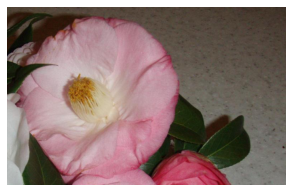

In [6]:
img = PILImage.create(files[0])
img.show()

In [7]:
train = pd.read_csv(path/'train.txt', header=None, sep=' ')
train.head() #head displays the first 5 rows of the dataframe

,0,1
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [8]:
cols = ['name', 'label']
train.columns = cols
train.head()


,name,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [9]:
valid = pd.read_csv(path/'valid.txt', sep=" ", names= cols )
# test df
test = pd.read_csv(path/'test.txt', sep=" ", names= cols )
valid.head()

,name,label
0,jpg/image_04467.jpg,89
1,jpg/image_07129.jpg,44
2,jpg/image_05166.jpg,4
3,jpg/image_07002.jpg,34
4,jpg/image_02007.jpg,79


In [10]:
print(f"The number of images in training set are:{len(train)}")
print(f"The number of images in validation set are:{len(valid)}")
print(f"The number of images in test set are:{len(valid)}")

The number of images in training set are:1020
The number of images in validation set are:1020
The number of images in test set are:1020


In [11]:
df = pd.concat([train, valid, test], axis=0)
df.head()


,name,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [12]:
df.to_csv(r'C:\Users\Neo\Downloads\export_dataframe.csv', index = False, header=True)
print(df)

                     name  label
0     jpg/image_03860.jpg     16
1     jpg/image_06092.jpg     13
2     jpg/image_02400.jpg     42
3     jpg/image_02852.jpg     55
4     jpg/image_07710.jpg     96
...                   ...    ...
6144  jpg/image_08168.jpg     61
6145  jpg/image_07487.jpg     94
6146  jpg/image_04432.jpg     89
6147  jpg/image_02532.jpg     75
6148  jpg/image_00178.jpg     76

[8189 rows x 2 columns]


In [13]:
labels = pd.read_csv(r'flowers.txt', header=None, names = ['labels'])
labels['labels'] = labels['labels'].apply(lambda x: x.replace("'", ""))
labels.head()

,labels
0,pink primrose
1,hard-leaved pocket orchid
2,canterbury bells
3,sweet pea
4,english marigold


In [14]:
labels_dict = dict(zip(list(range(len(labels))), labels['labels']))

In [15]:
df['class'] = df['label'].apply(lambda x: labels_dict[x])
df.head()

,name,label,class
0,jpg/image_03860.jpg,16,purple coneflower
1,jpg/image_06092.jpg,13,spear thistle
2,jpg/image_02400.jpg,42,sword lily
3,jpg/image_02852.jpg,55,bishop of llandaff
4,jpg/image_07710.jpg,96,mallow


In [16]:
def get_x(r): return path/r['name']
def get_y(r): return r['class']

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x= get_x,
                   get_y= get_y, 
                   item_tfms = Resize(224))
dls = dblock.dataloaders(df)

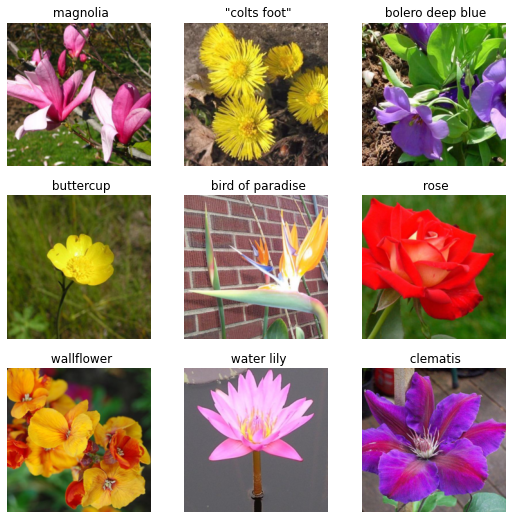

In [17]:
dls.show_batch()

In [18]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [26]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 64 x 56 x 56    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
_________________________________________________

In [19]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,2.762043,0.672695,0.838118,01:38


epoch,train_loss,valid_loss,accuracy,time
0,0.624154,0.212841,0.947465,02:13
1,0.237136,0.166220,0.956628,02:13


In [20]:
learn.save('flowers-baseline')

Path('models/flowers-baseline.pth')

In [21]:
learn.export()

In [22]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

In [32]:
learn_inf.dls.vocab

[' "colts foot"', ' alpine sea holly', ' anthurium', ' artichoke', ' azalea', ' ball moss', ' balloon flower', ' barbeton daisy', ' bearded iris', ' bee balm', ' bird of paradise', ' bishop of llandaff', ' black-eyed susan', ' blackberry lily', ' blanket flower', ' bolero deep blue', ' bougainvillea', ' bromelia', ' buttercup', ' californian poppy', ' camellia', ' canna lily', ' canterbury bells', ' cape flower', ' carnation', ' cautleya spicata', ' clematis', ' columbine', ' common dandelion', ' corn poppy', ' cyclamen ', ' daffodil', ' desert-rose', ' english marigold', ' fire lily', ' foxglove', ' frangipani', ' fritillary', ' garden phlox', ' gaura', ' gazania', ' geranium', ' giant white arum lily', ' globe thistle', ' globe-flower', ' grape hyacinth', ' great masterwort', ' hard-leaved pocket orchid', ' hibiscus', ' hippeastrum ', ' japanese anemone', ' king protea', ' lenten rose', ' lotus', ' love in the mist', ' magnolia', ' mallow', ' marigold', ' mexican aster', ' mexican pe

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [25]:
img = PILImage.create(btn_upload.data[-1])
img

IndexError: list index out of range

In [32]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
lbl_pred = widgets.Label()
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction:  camellia; Probability: 0.9815')

In [27]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

IndexError: list index out of range

IndexError: list index out of range

IndexError: list index out of range

IndexError: list index out of range

IndexError: list index out of range

In [34]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [35]:
btn_upload = widgets.FileUpload()

VBox([widgets.Label('Upload an image of a flower you want classified!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [30]:
from ipywidgets.widgets import VBox